#**Assessment Task 4: Problem solving task**



## 3. Load and pre-process the dataset:

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [149]:
# Read data from a CSV file into a DataFrame
crm_df = pd.read_csv("/content/Customer relationship marketing (CRM).csv")

In [150]:
# List the first five rows of the DataFrame:
crm_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [151]:
# Get a summary of data type:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9134 non-null   object 
 1   Customer Lifetime Value    9134 non-null   float64
 2   Response                   9134 non-null   object 
 3   Coverage                   9134 non-null   object 
 4   Education                  9134 non-null   object 
 5   Effective To Date          9134 non-null   object 
 6   EmploymentStatus           9134 non-null   object 
 7   Gender                     9134 non-null   object 
 8   Income                     9134 non-null   int64  
 9   Location Code              9134 non-null   object 
 10  Marital Status             9134 non-null   object 
 11  Monthly Premium Auto       9134 non-null   int64  
 12  Months Since Last Claim    9134 non-null   int64  
 13  Number of Open Complaints  9134 non-null   int64

In [152]:
# Change the format of 'Effective To Date' column
crm_df['Effective To Date'] = pd.to_datetime(crm_df['Effective To Date'])

### 3.1 Data Pre-processing

- Checking missing data

In [153]:
# Check to NA values
print(crm_df.isnull().values.sum())
#check the column-wise distribution of null values:
print(crm_df.isnull().sum())

0
State                        0
Customer Lifetime Value      0
Response                     0
Coverage                     0
Education                    0
Effective To Date            0
EmploymentStatus             0
Gender                       0
Income                       0
Location Code                0
Marital Status               0
Monthly Premium Auto         0
Months Since Last Claim      0
Number of Open Complaints    0
Number of Policies           0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Total Claim Amount           0
Vehicle Class                0
dtype: int64


- Convert categorical features to a numerical representation:
  - Ordinal data





In [154]:
# Import libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [155]:
# Education column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=['High School or Below', 'College', 'Bachelor','Master','Doctor'])

cat = pd.Categorical(crm_df['Education'], 
                     categories=['High School or Below', 'College', 'Bachelor','Master','Doctor'], 
                     ordered=True)

labels, unique = pd.factorize(cat, sort=True)
crm_df['Education'] = labels

In [156]:
# Coverage column

encoder = OrdinalEncoder(categories=['Basic','Extended','Premium'])

cat1 = pd.Categorical(crm_df['Coverage'], 
                     categories=['Basic','Extended','Premium'], 
                     ordered=True)

labels, unique = pd.factorize(cat1, sort=True)
crm_df['Coverage'] = labels

In [157]:
# Location Code column

encoder = OrdinalEncoder(categories=['Rural','Suburban','Urban'])

cat2 = pd.Categorical(crm_df['Location Code'], 
                     categories=['Rural','Suburban','Urban'], 
                     ordered=True)

labels, unique = pd.factorize(cat2, sort=True)
crm_df['Location Code'] = labels

In [158]:
# Vehicle classes
encoder = OrdinalEncoder(categories=['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car'])

output = pd.Categorical(crm_df['Vehicle Class'], 
                     categories=['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car'], 
                     ordered=True)

labels, unique = pd.factorize(output, sort=True)
crm_df['Vehicle Class'] = labels

  - Nominal Data

In [159]:
 from sklearn import preprocessing
 crm_df_new = crm_df.select_dtypes(exclude=['datetime64']).apply(preprocessing.LabelEncoder().fit_transform)

In [160]:
crm_df_new.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,4,975,0,0,2,1,0,3322,1,1,8,32,0,0,2,0,0,2941,0
1,0,4659,0,1,2,4,0,0,1,2,32,13,0,7,5,2,0,4880,1
2,2,6900,0,2,2,1,0,2820,1,1,46,18,0,1,5,0,0,3897,0
3,1,5140,0,0,2,4,1,0,1,1,44,18,0,6,1,0,2,3764,2
4,4,1058,0,0,2,1,1,2510,0,2,12,12,0,0,3,0,0,1138,1


- Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f512cc2b4d0>,
      dtype=object)

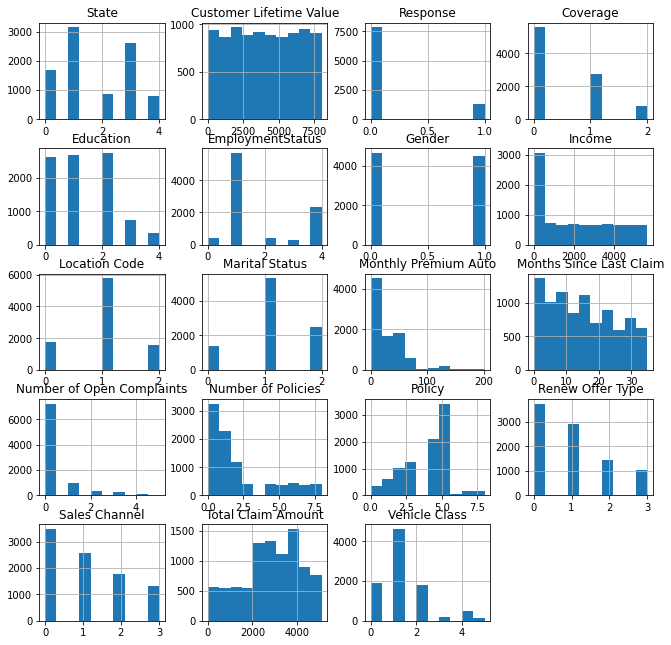

In [161]:
# Plot for exploring features distribution
crm_df_new[crm_df_new.dtypes[(crm_df_new.dtypes=="float64")|(crm_df_new.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

- Rescale Data: rescaling the attributes to all have the same scale into the range between 0 and 1

In [162]:
from sklearn.preprocessing import MinMaxScaler

# separate array into input and output components
input_data = crm_df_new.drop(['Vehicle Class'],axis=1) #independent columns
target = crm_df_new['Vehicle Class']    #target column 


scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_input_data = scaler.fit_transform(input_data)
scaled_features = pd.DataFrame(rescaled_input_data, columns=input_data.columns)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaled_input_data[0:5,:])


[[1.    0.121 0.    0.    0.5   0.25  0.    0.584 0.5   0.5   0.04  0.914
  0.    0.    0.25  0.    0.    0.576]
 [0.    0.579 0.    0.5   0.5   1.    0.    0.    0.5   1.    0.159 0.371
  0.    0.875 0.625 0.667 0.    0.956]
 [0.5   0.858 0.    1.    0.5   0.25  0.    0.495 0.5   0.5   0.229 0.514
  0.    0.125 0.625 0.    0.    0.763]
 [0.25  0.639 0.    0.    0.5   1.    1.    0.    0.5   0.5   0.219 0.514
  0.    0.75  0.125 0.    0.667 0.737]
 [1.    0.132 0.    0.    0.5   0.25  1.    0.441 0.    1.    0.06  0.343
  0.    0.    0.375 0.    0.    0.223]]


## 4. Analyse the importance of the features for predicting customer response :

1. Univariate Selection: uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the CRM Dataset.

In [163]:
scaled_features = pd.DataFrame(rescaled_input_data, columns=input_data.columns)

#apply SelectKBest class to extract top 10 best features
bestfeatures_scale = SelectKBest(score_func=chi2, k=10)
fit_scale = bestfeatures_scale.fit(scaled_features,output_data)
dfscores_scale = pd.DataFrame(fit_scale.scores_)
dfcolumns_scale = pd.DataFrame(input_data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns_scale,dfscores_scale],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs        Score
10       Monthly Premium Auto  1223.017292
1     Customer Lifetime Value   220.540358
17         Total Claim Amount   172.575425
15           Renew Offer Type    25.589717
2                    Response    18.172911
3                    Coverage     7.603639
6                      Gender     4.442072
7                      Income     3.489311
9              Marital Status     2.555128
12  Number of Open Complaints     2.135619


2. Feature Importance: the feature importance property of model.
(the higher the score more important or relevant is the feature towards your output variable)


[0.039 0.094 0.018 0.07  0.045 0.024 0.021 0.048 0.021 0.031 0.246 0.058
 0.028 0.045 0.042 0.035 0.042 0.095]


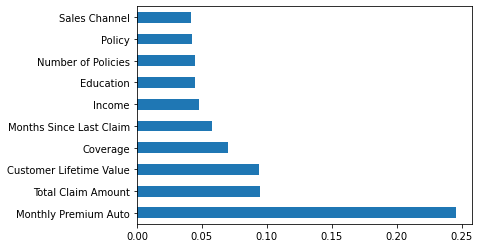

In [164]:
# Extra Tree Classifier feature importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(scaled_features,output_data)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=input_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


### 5. Create three supervised machine learning (ML) models

In [165]:
#Create the data sets for training and testing
from sklearn.model_selection import train_test_split

new_features = scaled_features.values

features = crm_df_new[['Monthly Premium Auto', 'Customer Lifetime Value','Total Claim Amount',
                           'Renew Offer Type','Response','Coverage','Gender','Income','Marital Status',
                           'Number of Open Complaints']].values
targets = crm_df_new['Vehicle Class'].values					

# Split between training and testing sets:
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.25, random_state=42)

1. K-Nearesr Neighbors (K-NN)


In [166]:
# Choosing a K Value
error_rate = []

for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

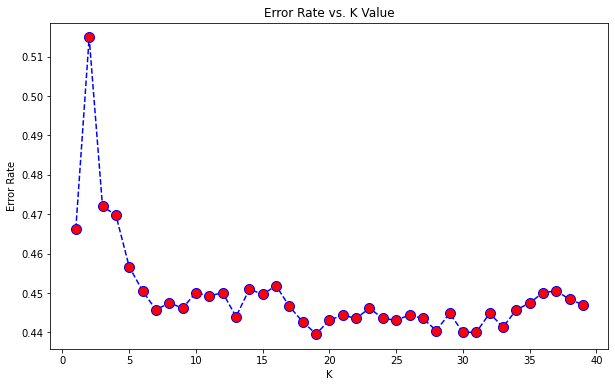

In [167]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [168]:
#instantiate a kNN classifier from sklearn
from sklearn import neighbors
weights='uniform'
k = 19
knn = neighbors.KNeighborsClassifier(k,weights=weights)

# Using data after scaling and feature importance process
X = scaled_features.values
Y = crm_df_new['Vehicle Class'].values
# split traing and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# fit model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [169]:
# Predictions 
pred = knn.predict(X_test)

In [170]:
# Evaluations
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[  45  416   11    0    2    0]
 [  67 1096   21    0    0    0]
 [  18  283  135    0    2    0]
 [   0    4   35    2    2    2]
 [   7   72   36    0    2    0]
 [   0    4   22    0    0    0]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.15       474
           1       0.58      0.93      0.72      1184
           2       0.52      0.31      0.39       438
           3       1.00      0.04      0.09        45
           4       0.25      0.02      0.03       117
           5       0.00      0.00      0.00        26

    accuracy                           0.56      2284
   macro avg       0.45      0.23      0.23      2284
weighted avg       0.50      0.56      0.48      2284



2. Naive Bayes Classifier

In [171]:
from sklearn.naive_bayes import GaussianNB
# Using dataset before scaling with all features
all_features = crm_df_new.drop(['Vehicle Class'],axis=1).values
label_data = crm_df_new['Vehicle Class'].values					

# Split between training and testing sets:
input_train, input_test, label_train, label_test = train_test_split(all_features, label_data, test_size=0.3, random_state=42)

# Build model
naive_bayes = GaussianNB()
 
# Fitting the data to the classifier
naive_bayes.fit(input_train , label_train)
 
# Predict on test data
y_predicted = naive_bayes.predict(input_test)

In [172]:
# Evaluations
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(label_test,y_predicted))
print(classification_report(label_test,y_predicted))

[[   0  526   41    0    3    0]
 [   0 1271  127    0    2    0]
 [   0   58  439    5    4   26]
 [   0    0    0   25    1   30]
 [   0   11  119    4    7    7]
 [   0    0    0   16    1   18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.68      0.91      0.78      1400
           2       0.60      0.83      0.70       532
           3       0.50      0.45      0.47        56
           4       0.39      0.05      0.08       148
           5       0.22      0.51      0.31        35

    accuracy                           0.64      2741
   macro avg       0.40      0.46      0.39      2741
weighted avg       0.50      0.64      0.55      2741



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Decision Tree Classifier

In [173]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)  
# Training model  
# Using scaling dataset with feature importances
clf_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [174]:
# Predict
y_predict = clf_model.predict(X_test)

In [175]:
# Evaluations
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))

[[   4  470    0    0    0    0]
 [   0 1184    0    0    0    0]
 [   0    0  438    0    0    0]
 [   0    0   11   34    0    0]
 [   0    0  117    0    0    0]
 [   0    0    5   21    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       474
           1       0.72      1.00      0.83      1184
           2       0.77      1.00      0.87       438
           3       0.62      0.76      0.68        45
           4       0.00      0.00      0.00       117
           5       0.00      0.00      0.00        26

    accuracy                           0.73      2284
   macro avg       0.52      0.46      0.40      2284
weighted avg       0.74      0.73      0.62      2284



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Hyperparameter Tuning to Improve Model Performance.

In [137]:
from sklearn.model_selection import GridSearchCV
# KNN Classifier
#List Hyperparameters to tune
leaf_size = list(range(1,10))
n_neighbors = list(range(1,15))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = neighbors.KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(new_features,targets)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


In [140]:
print('BEST SCORE:\n',best_model.best_score_)

BEST SCORE:
 0.6296240062697578


In [179]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [5, None],
              "max_features": [5,7,9, 10, 15, 17],
              "min_samples_leaf": [2,4, 6, 8],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(new_features,targets)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 2}
Best score is 0.7253120558064472
